## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [2]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [11]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [13]:
categorias = df['ocean_proximity'].unique()

for categoria in categorias:
    df[f'proximity_{categoria}'] = (df['ocean_proximity'] == categoria).astype(int)

df_scikit = df.drop(columns=['ocean_proximity'])

df_scikit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             20640 non-null  float64
 1   latitude              20640 non-null  float64
 2   housing_median_age    20640 non-null  float64
 3   total_rooms           20640 non-null  float64
 4   total_bedrooms        20640 non-null  float64
 5   population            20640 non-null  float64
 6   households            20640 non-null  float64
 7   median_income         20640 non-null  float64
 8   median_house_value    20640 non-null  float64
 9   proximity_NEAR BAY    20640 non-null  int32  
 10  proximity_<1H OCEAN   20640 non-null  int32  
 11  proximity_INLAND      20640 non-null  int32  
 12  proximity_NEAR OCEAN  20640 non-null  int32  
 13  proximity_ISLAND      20640 non-null  int32  
dtypes: float64(9), int32(5)
memory usage: 1.8 MB


In [15]:
X = df_scikit.drop(columns = ['median_house_value'])
Y = df_scikit['median_house_value']

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.3, random_state=100)

In [17]:
reg = DecisionTreeRegressor( max_depth = 10, random_state = 123)
reg.fit(X_treino, Y_treino)

DecisionTreeRegressor(max_depth=10, random_state=123)

In [19]:
Y_pred_reg = reg.predict(X_teste)
print('MSE da arvore :', mean_squared_error(Y_teste, Y_pred_reg))

MSE da arvore : 3585447534.2207346


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [22]:
ccp_path = reg.cost_complexity_pruning_path(X_treino, Y_treino)
ccp_alphas, impurities = ccp_path.ccp_alphas, ccp_path.impurities

In [24]:
ccp_alphas

array([0.00000000e+00, 3.46068660e-05, 1.24584718e+01, 8.85935770e+01,
       1.24930786e+02, 2.71317829e+02, 4.00055371e+02, 1.08527132e+03,
       1.28772148e+03, 1.28772148e+03, 1.33028793e+03, 1.46214009e+03,
       1.55396598e+03, 1.99889258e+03, 2.70037375e+03, 3.46068660e+03,
       4.57675803e+03, 4.73733389e+03, 4.81866002e+03, 4.98338870e+03,
       5.15088594e+03, 5.40732281e+03, 8.97944352e+03, 9.19469823e+03,
       9.65150886e+03, 1.17165006e+04, 1.49501661e+04, 1.52493771e+04,
       1.54442636e+04, 1.74979236e+04, 1.84665698e+04, 1.87877215e+04,
       2.04350083e+04, 2.15702519e+04, 2.16292913e+04, 2.16292913e+04,
       2.19296788e+04, 2.21303987e+04, 2.23269657e+04, 2.32146318e+04,
       2.37555371e+04, 2.41975821e+04, 2.52284053e+04, 2.63570506e+04,
       2.95071982e+04, 2.95092193e+04, 3.01248962e+04, 3.05263704e+04,
       3.09388843e+04, 3.13541667e+04, 3.27714332e+04, 3.36877076e+04,
       3.39313977e+04, 3.41279317e+04, 3.54374308e+04, 3.56592608e+04,
      

In [26]:
impurities

array([2.29125308e+09, 2.29125308e+09, 2.29125309e+09, 2.29125318e+09,
       2.29125331e+09, 2.29125358e+09, 2.29125398e+09, 2.29125506e+09,
       2.29125635e+09, 2.29125764e+09, 2.29125897e+09, 2.29126043e+09,
       2.29126199e+09, 2.29126398e+09, 2.29126668e+09, 2.29127015e+09,
       2.29127472e+09, 2.29127946e+09, 2.29128428e+09, 2.29128926e+09,
       2.29129441e+09, 2.29129982e+09, 2.29130880e+09, 2.29131799e+09,
       2.29132765e+09, 2.29133936e+09, 2.29135431e+09, 2.29136956e+09,
       2.29138501e+09, 2.29140250e+09, 2.29142097e+09, 2.29143976e+09,
       2.29146019e+09, 2.29148176e+09, 2.29150339e+09, 2.29152502e+09,
       2.29154695e+09, 2.29156908e+09, 2.29159141e+09, 2.29161462e+09,
       2.29163838e+09, 2.29166258e+09, 2.29168781e+09, 2.29171416e+09,
       2.29174367e+09, 2.29177318e+09, 2.29180330e+09, 2.29183383e+09,
       2.29186477e+09, 2.29189612e+09, 2.29192889e+09, 2.29196258e+09,
       2.29199651e+09, 2.29203064e+09, 2.29206608e+09, 2.29210174e+09,
      

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [29]:
arvores = []
for ccp_alpha in ccp_alphas:
    reg_tree = DecisionTreeRegressor(random_state = 0, ccp_alpha = ccp_alpha)
    reg_tree.fit(X_treino, Y_treino)
    arvores.append(reg_tree)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [31]:
mse_arvores = []
for arvore in arvores:
    mse = mean_squared_error(Y_teste, arvore.predict(X_teste))
    mse_arvores.append(mse)

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

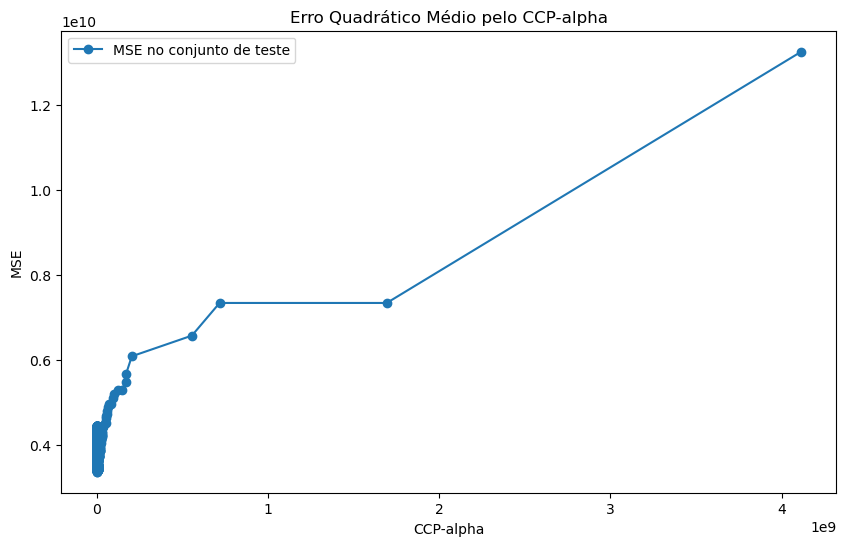

In [33]:
plt.figure(figsize = (10, 6))
plt.plot(ccp_alphas, mse_arvores, marker = "o", label = "MSE no conjunto de teste")
plt.xlabel("CCP-alpha")
plt.ylabel("MSE")
plt.title("Erro Quadrático Médio pelo CCP-alpha")
plt.legend()
plt.show()

Melhor valor de alpha seria perto de 0, algo entre 0.1 e 0.2, sendo assim será usado 0.15

In [35]:
reg_tree_melhor = DecisionTreeRegressor(random_state = 0, ccp_alpha = 0.15)
reg_tree_melhor.fit(X_treino, Y_treino)

DecisionTreeRegressor(ccp_alpha=0.15, random_state=0)

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [37]:
Y_pred = reg_tree_melhor.predict(X_teste)
r2_score(Y_teste, Y_pred)

0.6629329391803701

### 7. Visualize esta árvore.

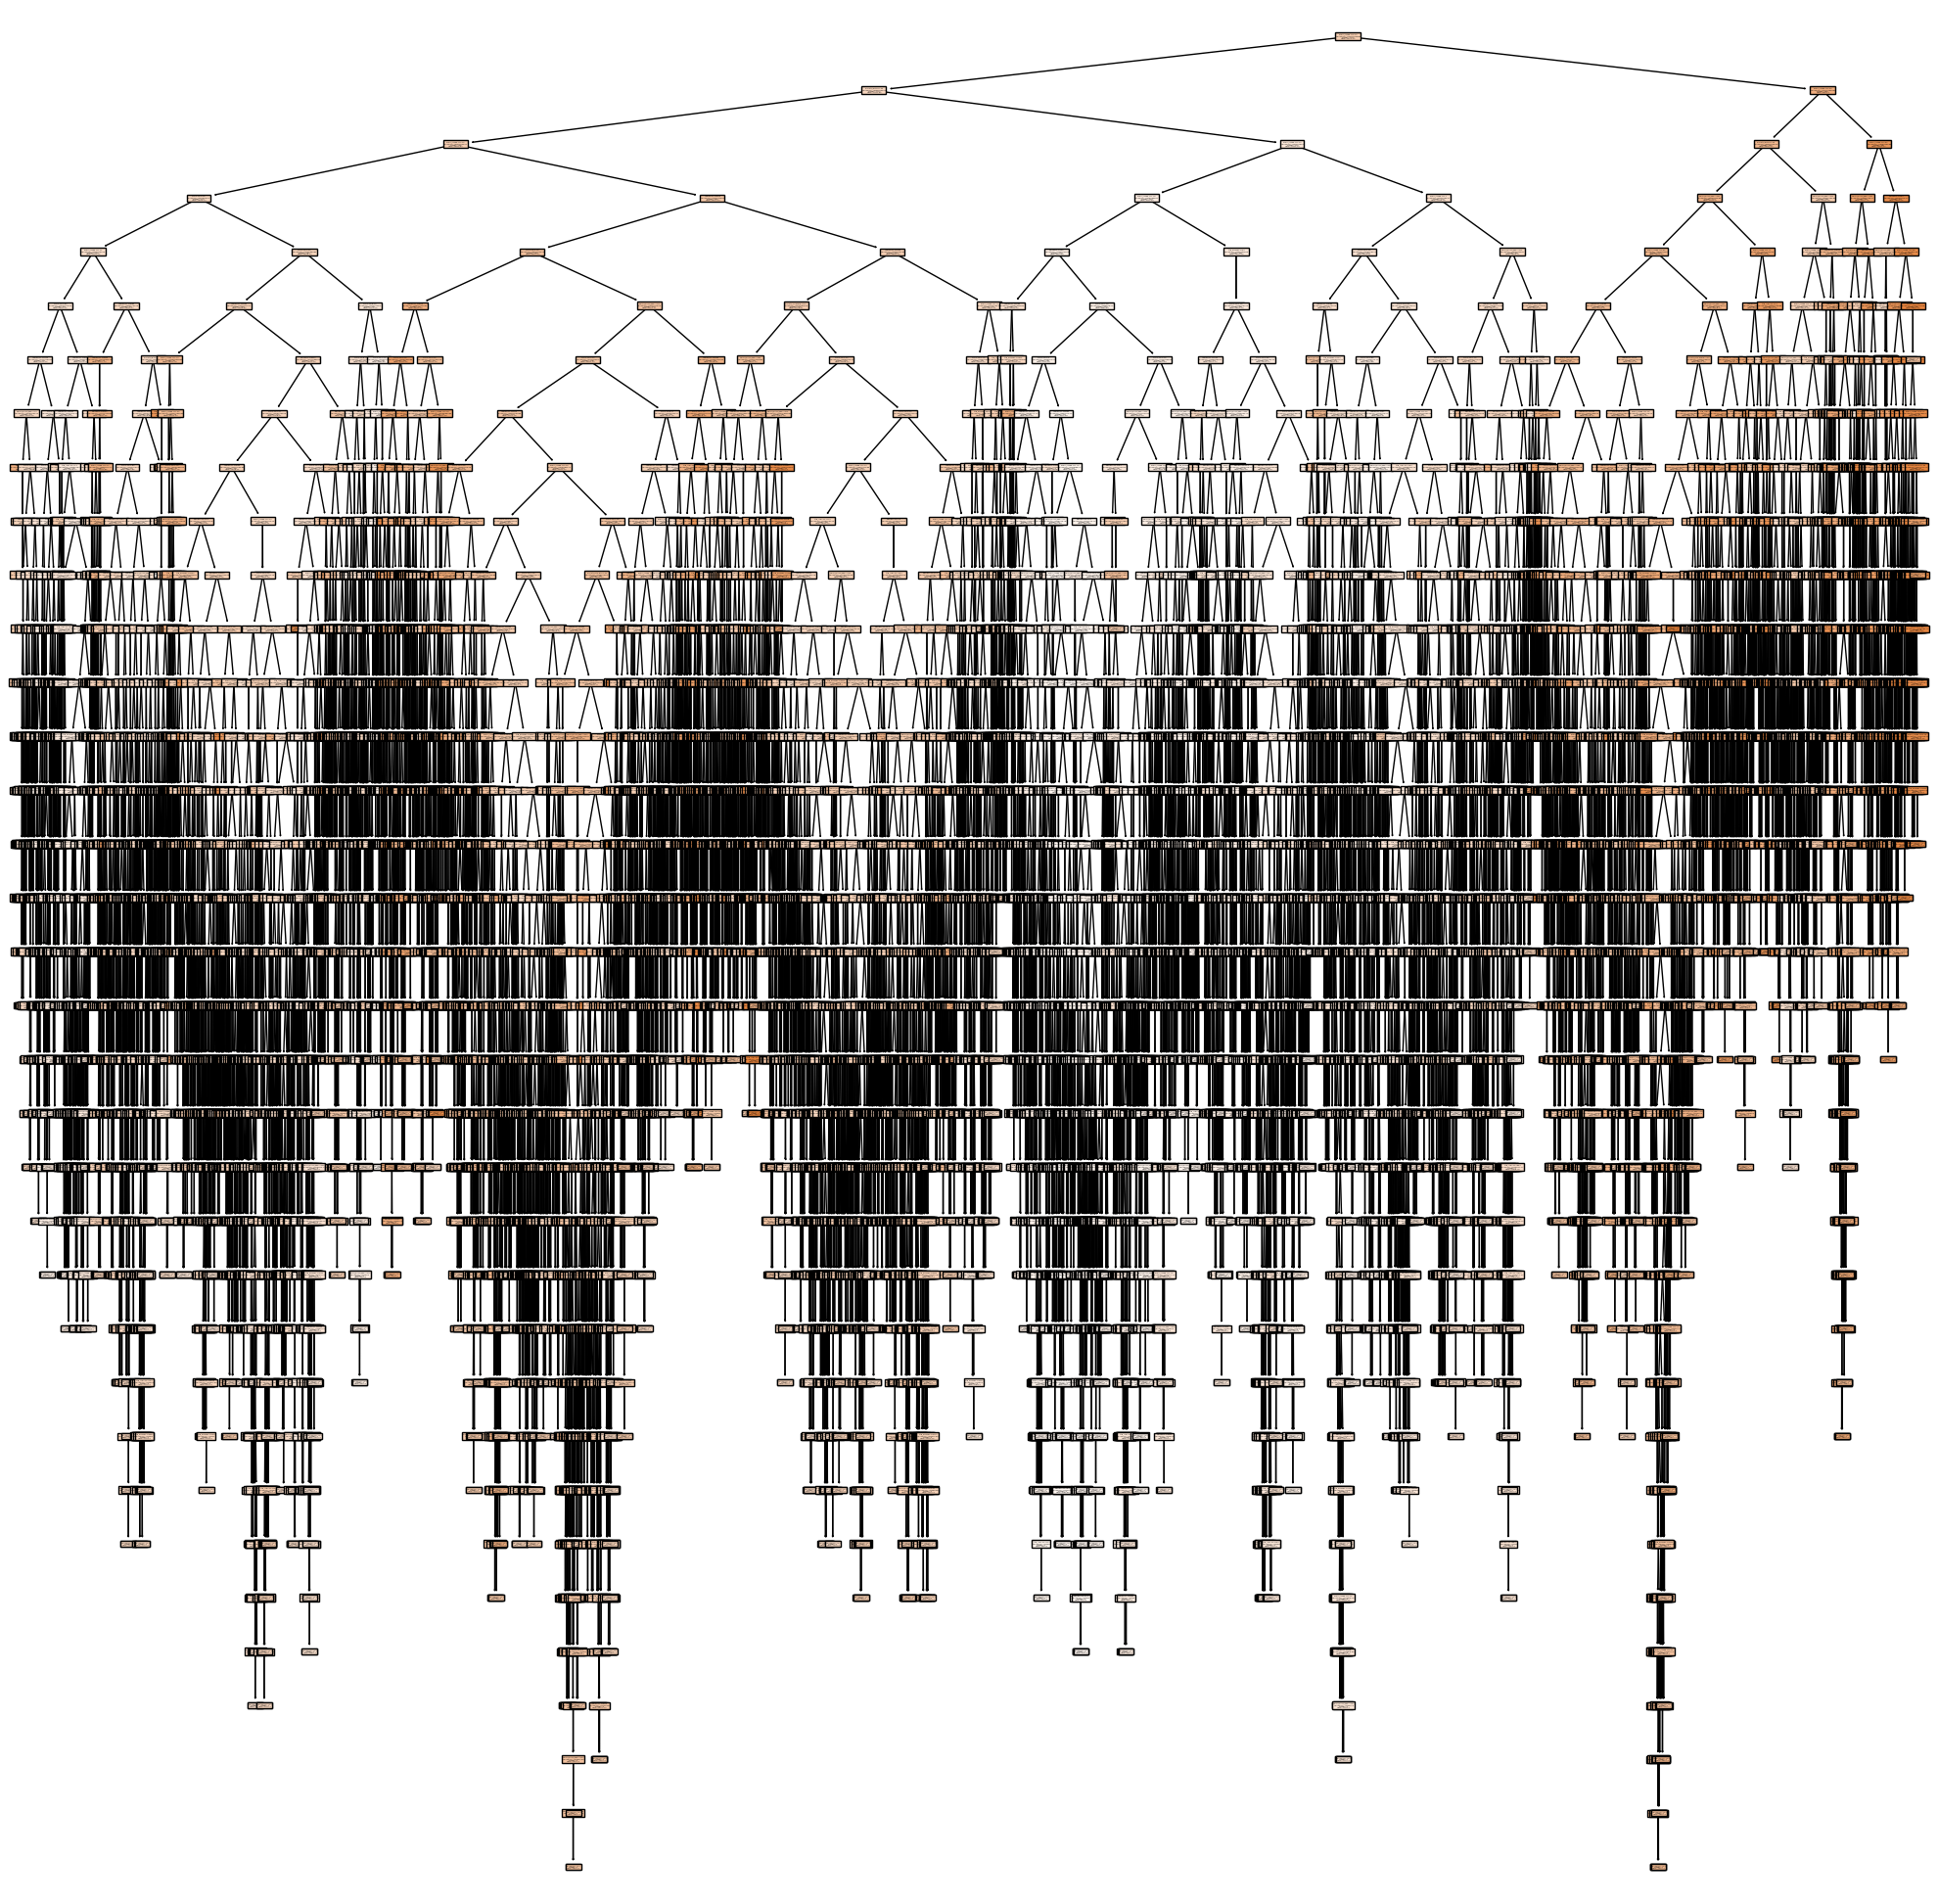

In [43]:
plt.figure(figsize=(25, 25))
plot_tree(reg_tree_melhor, filled = True, feature_names = X.columns)
plt.show()